In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


In [38]:
df = pd.read_csv('/kaggle/input/habermans-survival-data-set/haberman.csv', names=['age', 'year', 'postive_nodes', 'survival_status_after_5_yrs'])

In [39]:
df.head()

,age,year,postive_nodes,survival_status_after_5_yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [40]:
print(df.shape)

(306, 4)


In [41]:
df.columns

Index(['age', 'year', 'postive_nodes', 'survival_status_after_5_yrs'], dtype='object')

In [42]:
df.describe()

,age,year,postive_nodes,survival_status_after_5_yrs
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [43]:
df['survival_status_after_5_yrs'].value_counts()

1    225
2     81
Name: survival_status_after_5_yrs, dtype: int64

This shows that most of the people survived over 5 years after the operation

# PairPlot

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


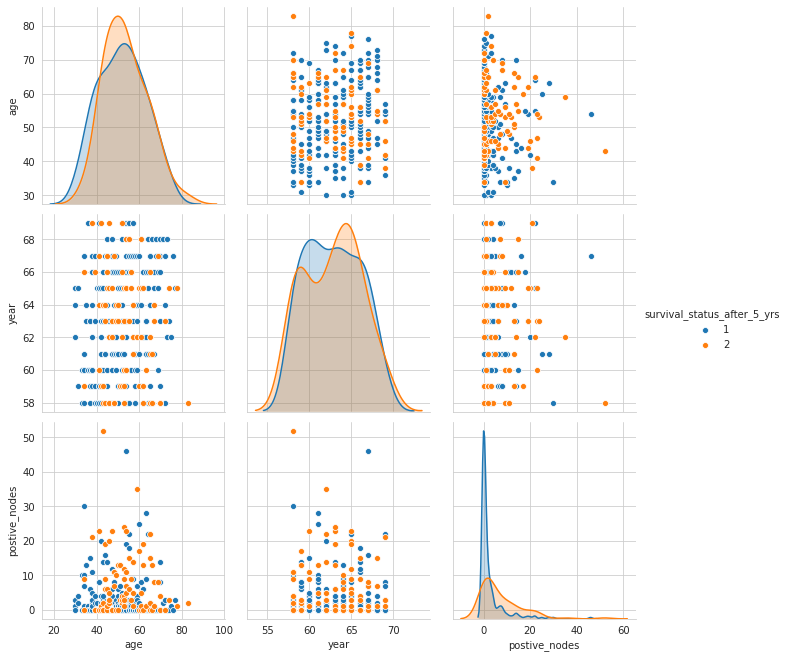

In [44]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="survival_status_after_5_yrs", size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

In [45]:
# modify the target column values to be meaningful as well as categorical
df['survival_status_after_5_yrs'] = df['survival_status_after_5_yrs'].map({1:"yes", 2:"no"})
df['survival_status_after_5_yrs'] = df['survival_status_after_5_yrs'].astype('category')
print(df.head())

   age  year  postive_nodes survival_status_after_5_yrs
0   30    64              1                         yes
1   30    62              3                         yes
2   30    65              0                         yes
3   31    59              2                         yes
4   31    65              4                         yes


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


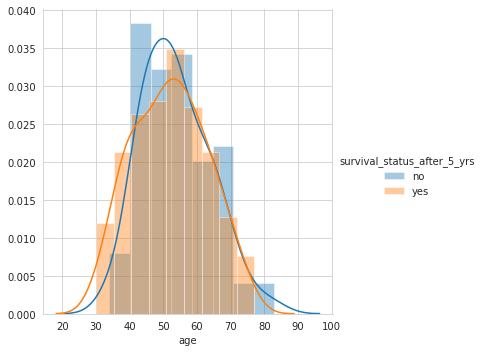

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


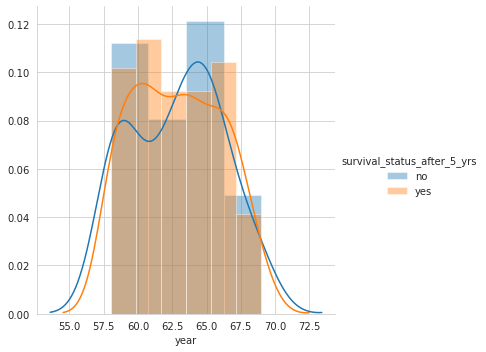

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


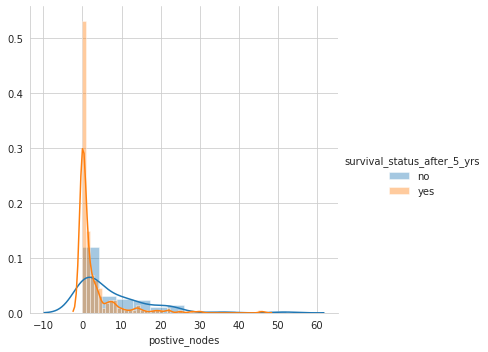

In [46]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='survival_status_after_5_yrs', size=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

********* age *********
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]
********* year *********
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]
********* postive_nodes *********
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


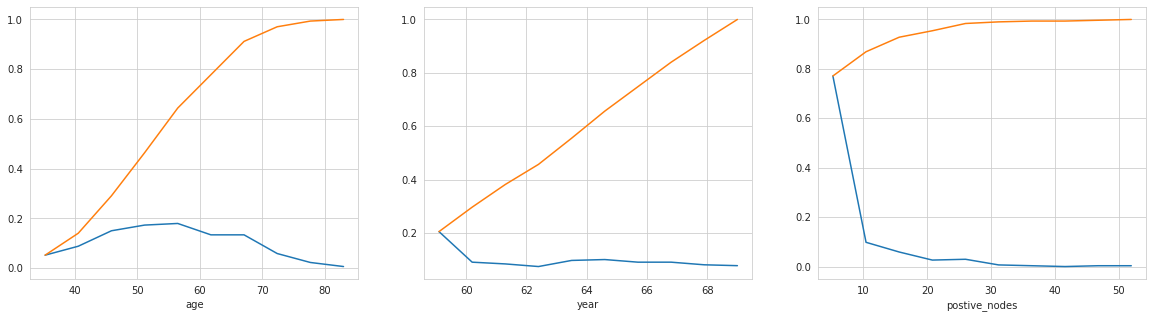

In [48]:
# cdf
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    print("********* "+feature+" *********")
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    print("Bin Edges: {}".format(bin_edges))
    pdf = counts/sum(counts)
    print("PDF: {}".format(pdf))
    cdf = np.cumsum(pdf)
    print("CDF: {}".format(cdf))
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

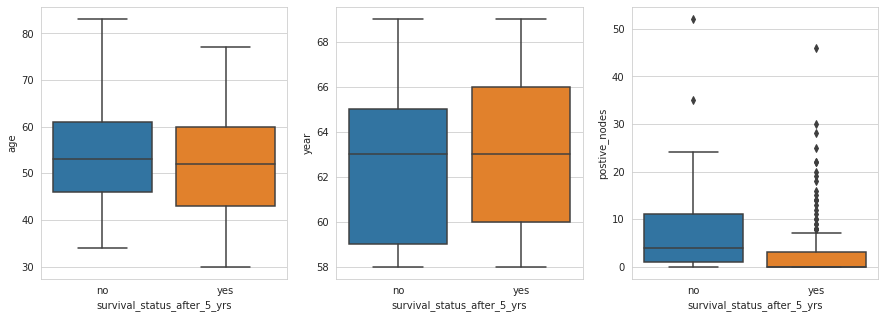

In [51]:
#5.3 Box Plots
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_yrs', y=feature, data=df, ax=axes[idx])
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

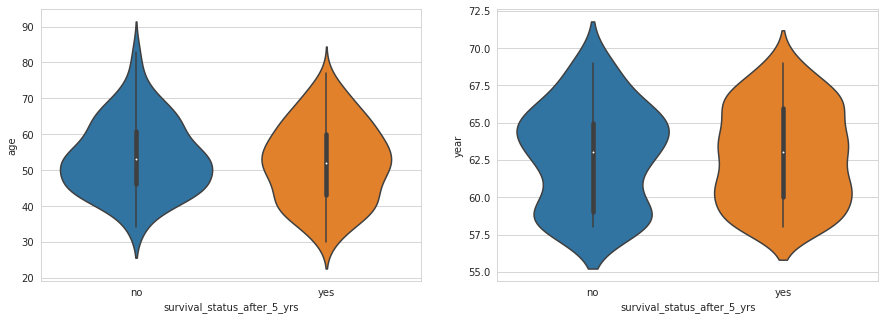

In [53]:
#5.4 Violin Plots
"""
Violin plot is the combination of box plot and probability density function.
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.violinplot( x='survival_status_after_5_yrs', y=feature, data=df, ax=axes[idx])
plt.show()